In [ ]:
# Programmers: Grant Burk and Ben Croyle
# Code packages: numpy and matplotlib (see below)
# The approach to Part 2, Question 1 was to utilize the formulas to solve for each of the new columns row by row. The
#   approach for Part 2, Question 3 was to set up some initial values that followed the requirements of the question,
#   then calculate the required values using formulas derived from the know formulas given in class/the slides. These
#   equations were then plotted.

Part 2, Question 1:

In [18]:
# Given from the initial table
arrival_time = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
service_duration = [2.22, 1.76, 2.13, 0.14, 0.76, 0.70, 0.47, 0.22, 0.18, 2.41, 0.41, 0.46, 1.37, 0.27, 0.27]

# Columns to calculate
exit_time = []
service_start_time = []
time_in_queue = []
number_in_system = []
number_in_queue = []

# Calculate the values for each customer
for i in range(len(arrival_time)):
    # Calculate service start time
    if i == 0:
        service_start_time.append(arrival_time[i])
    else:
        service_start_time.append(max(arrival_time[i], exit_time[i-1]))
    
    # Calculate exit time
    exit_time.append(service_start_time[i] + service_duration[i])
    
    # Calculate time in queue
    time_in_queue.append(service_start_time[i] - arrival_time[i])
    
    # Number in system is always at least 1 when a customer arrives
    customer_count = 0
    for j in range(i):
        if(exit_time[j] > arrival_time[i]):
            customer_count += 1
            
    number_in_system.append(customer_count)
    
    # Number in queue at arrival time
    if(number_in_system[i] == 0):
        number_in_queue.append(number_in_system[i])
    else:
        number_in_queue.append(number_in_system[i] - 1)

# Output the calculated values
print("Arrival Time:", arrival_time)
print("Service Duration:", service_duration)
print("Service Start Time:", service_start_time)
print("Exit Time:", exit_time)
print("Time in Queue:", time_in_queue)
print("Number in System:", number_in_system)
print("Number in Queue:", number_in_queue)

# Calculate and display Lq (the time average number in queue) 
Lq = 0
for time in time_in_queue:
    Lq += time
Lq = Lq / 15.27
print("Lq: ", Lq)

# Calculate and display LqA (the average number in queue as seen by arriving customers)
LqA = 0
for person in number_in_queue:
    LqA += person
LqA = LqA / 15
print("LqA: ", LqA)

Arrival Time: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Service Duration: [2.22, 1.76, 2.13, 0.14, 0.76, 0.7, 0.47, 0.22, 0.18, 2.41, 0.41, 0.46, 1.37, 0.27, 0.27]
Service Start Time: [1, 3.22, 4.98, 7.11, 7.25, 8.01, 8.709999999999999, 9.18, 9.4, 10, 12.41, 12.82, 13.280000000000001, 14.650000000000002, 15]
Exit Time: [3.22, 4.98, 7.11, 7.25, 8.01, 8.709999999999999, 9.18, 9.4, 9.58, 12.41, 12.82, 13.280000000000001, 14.650000000000002, 14.920000000000002, 15.27]
Time in Queue: [0, 1.2200000000000002, 1.9800000000000004, 3.1100000000000003, 2.25, 2.01, 1.709999999999999, 1.1799999999999997, 0.40000000000000036, 0, 1.4100000000000001, 0.8200000000000003, 0.28000000000000114, 0.6500000000000021, 0]
Number in System: [0, 1, 2, 2, 2, 3, 4, 3, 2, 0, 1, 2, 1, 1, 0]
Number in Queue: [0, 0, 1, 1, 1, 2, 3, 2, 1, 0, 0, 1, 0, 0, 0]
Lq:  1.1146037982973152
LqA:  0.8


Part 2: Question 3

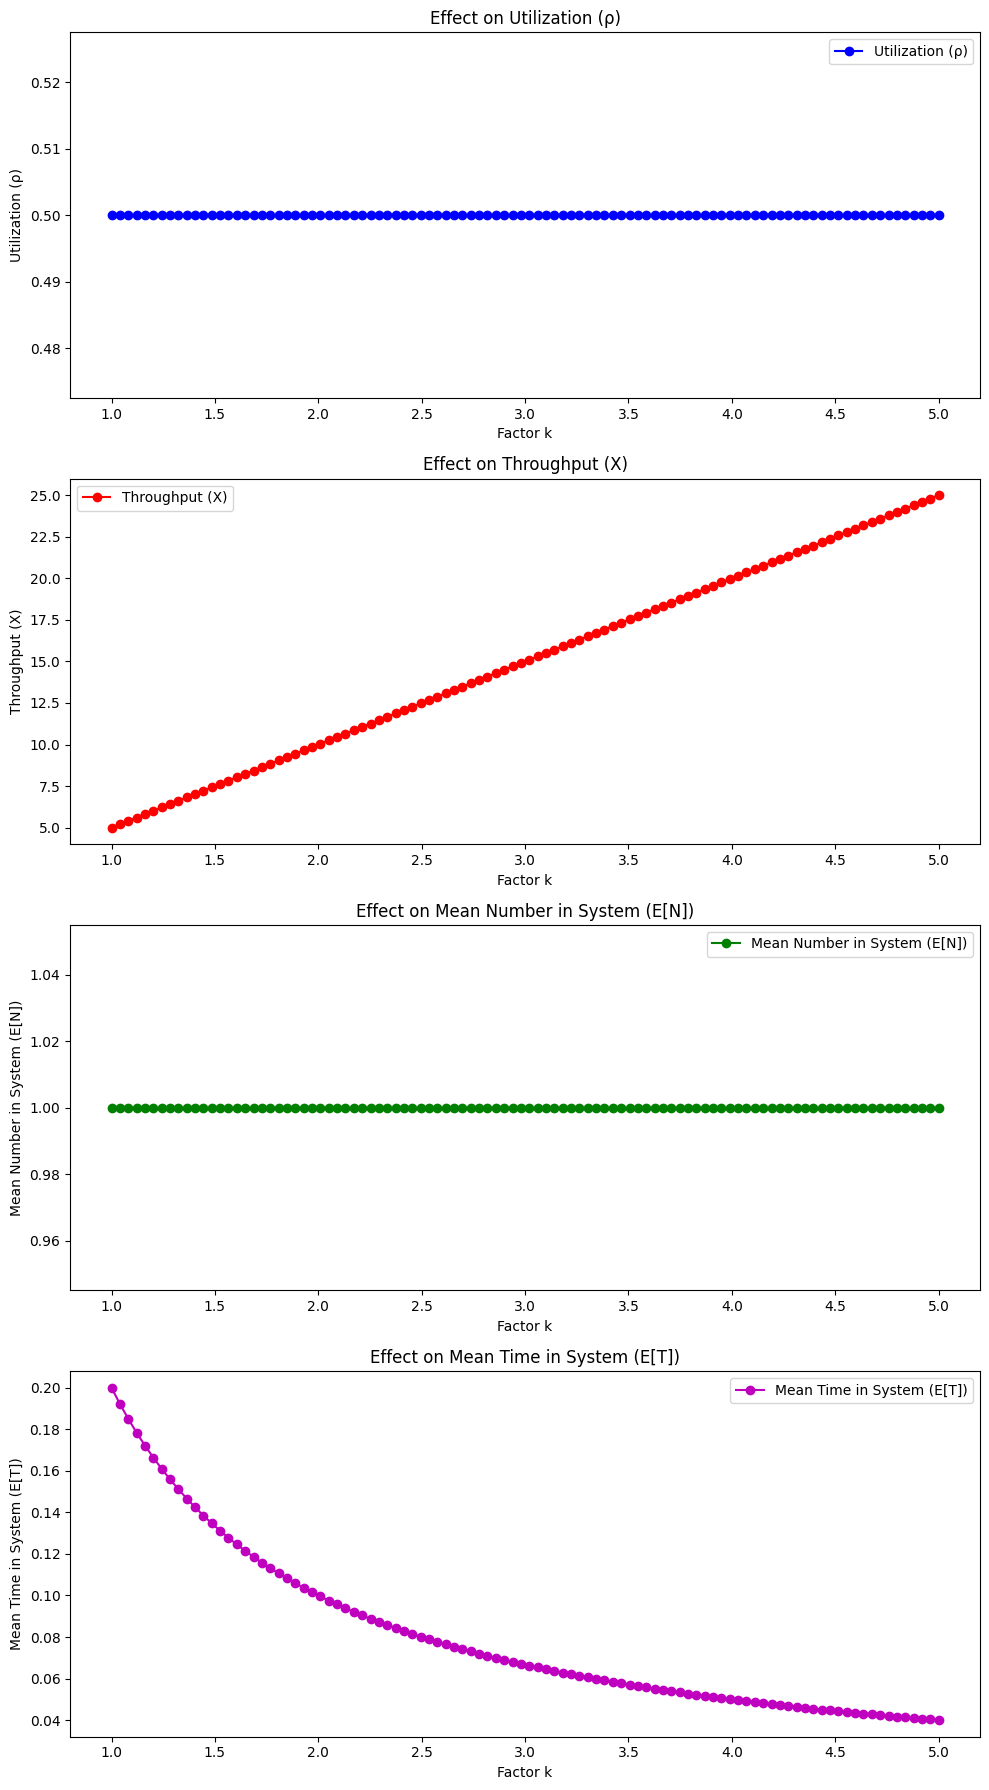

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial lambda and mu
lambda_initial = 5
mu_initial = 10

# Define the factor k
k_values = np.linspace(1, 5, 100)

# Compute the affected parameters for each k
rho_initial = lambda_initial / mu_initial
X_initial = lambda_initial
E_N_initial = rho_initial / (1 - rho_initial)
E_T_initial = 1 / (mu_initial - lambda_initial)

rho_new = rho_initial  # Utilization remains the same
X_new = k_values * X_initial  # Throughput increases by factor k
E_N_new = E_N_initial  # Mean number in system remains the same
E_T_new = E_T_initial / k_values  # Mean time in system decreases by factor k

# Plotting the results
fig, axs = plt.subplots(4, 1, figsize=(10, 18))

# (a) Utilization
axs[0].plot(k_values, [rho_initial]*len(k_values), 'bo-', label='Utilization (\u03C1)')
axs[0].set_title('Effect on Utilization (\u03C1)')
axs[0].set_xlabel('Factor k')
axs[0].set_ylabel('Utilization (\u03C1)')
axs[0].legend()

# (b) Throughput
axs[1].plot(k_values, X_new, 'ro-', label='Throughput (X)')
axs[1].set_title('Effect on Throughput (X)')
axs[1].set_xlabel('Factor k')
axs[1].set_ylabel('Throughput (X)')
axs[1].legend()

# (c) Mean Number in the System
axs[2].plot(k_values, [E_N_initial]*len(k_values), 'go-', label='Mean Number in System (E[N])')
axs[2].set_title('Effect on Mean Number in System (E[N])')
axs[2].set_xlabel('Factor k')
axs[2].set_ylabel('Mean Number in System (E[N])')
axs[2].legend()

# (d) Mean Time in the System
axs[3].plot(k_values, E_T_new, 'mo-', label='Mean Time in System (E[T])')
axs[3].set_title('Effect on Mean Time in System (E[T])')
axs[3].set_xlabel('Factor k')
axs[3].set_ylabel('Mean Time in System (E[T])')
axs[3].legend()

plt.tight_layout()
plt.show()
